## Food Inspections Evaluation

# 1.0 Problem Statment: 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go

In [ ]:
# ! conda install plotly

## 1.1 Executive Summary

## 1.2 Datasets Description:

## 2.0 Data Import : 

In [ ]:
# Read in datasets from csv to pandas dataframes,
#load only useful columns
food_inspect_data = pd.read_csv('Data/Food_Inspections.csv')

In [ ]:
# Quickly lowercase and camelcase all column names in a DataFrame
# we need to rename columns to use it with SQL later
food_inspect_data = food_inspect_data.rename(columns=lambda x: x.lower().replace(' ', '_').replace('#','').replace('-','_'))

## 2.1 Display Data:

In [ ]:
food_inspect_data.head()

In [ ]:
food_inspect_data.rename(columns={"license_": "license"}, inplace=True)

Briefly describe the data: 

# B

## 2.2 Investigate the Dataset 

In [ ]:
#check the shape of our dataset
food_inspect_data.shape

In [ ]:
# information about dataset
food_inspect_data.info()

In [ ]:
# total of missing values in each columns
# Verifying missing data
food_inspect_data.isnull().sum()

In [ ]:
food_inspect_data.describe()

In [127]:
food_inspect_data.facility_type.value_counts()

Restaurant                                   123783
Grocery Store                                 23988
School                                        11860
Children's Services Facility                   2725
Bakery                                         2707
Daycare (2 - 6 Years)                          2637
Daycare Above and Under 2 Years                2176
Long Term Care                                 1244
Catering                                       1105
Mobile Food Dispenser                           843
Liquor                                          830
Daycare Combo 1586                              780
Mobile Food Preparer                            551
Golden Diner                                    538
Wholesale                                       530
Hospital                                        501
TAVERN                                          252
Daycare (Under 2 Years)                         229
Special Event                                   205
Shared Kitch

# 2.3 Preprocessing and Data Structure

Preparation food inspections data 

##### Take just we need from dataset :

In [128]:
# Extracting facility_type Restaurant
# Only consider restaurants
food_inspect_data_restaurant = food_inspect_data[food_inspect_data['facility_type'] =='Restaurant']

In [129]:
food_inspect_data_restaurant.shape

(123783, 22)

In [130]:
food_inspect_data_restaurant.facility_type.count()

123783

In [131]:
food_inspect_data_restaurant.head()

,inspection_id,dba_name,aka_name,license,facility_type,risk,address,city,state,zip,...,results,violations,latitude,longitude,location,historical_wards_2003_2015,zip_codes,community_areas,census_tracts,wards
3,2288221,PALETERIA AYUTLA,PALETERIA AYUTLA,2321232.0,Restaurant,Risk 2 (Medium),2404 W 46TH PL,CHICAGO,IL,60632.0,...,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.809457,-87.684746,"(41.80945691736228, -87.68474598934672)",29.0,14924.0,55.0,687.0,3.0
5,2288211,SUBWAY,SUBWAY,1495274.0,Restaurant,Risk 1 (High),3167 N LINCOLN AVE,CHICAGO,IL,60657.0,...,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.939425,-87.668111,"(41.93942462169401, -87.66811073298523)",16.0,4449.0,57.0,712.0,40.0
7,2288229,SHINYA RAMEN HOUSE,SHINYA RAMEN HOUSE,2578639.0,Restaurant,Risk 1 (High),3240 S HALSTED ST,CHICAGO,IL,60608.0,...,Pass w/ Conditions,5. PROCEDURES FOR RESPONDING TO VOMITING AND D...,41.835224,-87.646356,"(41.83522370724441, -87.64635603210917)",26.0,14920.0,58.0,676.0,48.0
10,2286158,IVY HOTEL,IVY HOTEL,2653277.0,Restaurant,Risk 1 (High),233 E ONTARIO ST,CHICAGO,IL,60611.0,...,Not Ready,NaN,41.893265,-87.621812,"(41.8932651489868, -87.62181212015325)",22.0,21182.0,37.0,159.0,36.0
11,2286182,IVY HOTEL,IVY HOTEL,2653273.0,Restaurant,Risk 1 (High),233 E ONTARIO ST,CHICAGO,IL,60611.0,...,Pass w/ Conditions,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,41.893265,-87.621812,"(41.8932651489868, -87.62181212015325)",22.0,21182.0,37.0,159.0,36.0


In [132]:
# Only consider canvass inspections (not complaints or re-inspections)
food_inspect_data_restaurant = food_inspect_data_restaurant[food_inspect_data['inspection_type'] =='Canvass']

/Users/aseel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [133]:
# Drop unnecessary columns Because we know we're working on a restaurant in Chicago 
food_inspect_data_restaurant = food_inspect_data_restaurant.drop(['facility_type', 'city', 'state','aka_name','inspection_type'], axis=1)

In [134]:
food_inspect_data_restaurant.isnull().sum()

inspection_id                     0
dba_name                          0
license                           0
risk                              0
address                           0
zip                              17
inspection_date                   0
results                           0
violations                    13512
latitude                         71
longitude                        71
location                         71
historical_wards_2003_2015     1661
zip_codes                        71
community_areas                1661
census_tracts                    86
wards                          1661
dtype: int64

In [135]:
# convert date type from str to datetime to easy apply date things
food_inspect_data_restaurant['inspection_date'] =  pd.to_datetime(food_inspect_data['inspection_date'])

In [136]:
food_inspect_data_restaurant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66123 entries, 3 to 186347
Data columns (total 17 columns):
inspection_id                 66123 non-null int64
dba_name                      66123 non-null object
license                       66123 non-null float64
risk                          66123 non-null object
address                       66123 non-null object
zip                           66106 non-null float64
inspection_date               66123 non-null datetime64[ns]
results                       66123 non-null object
violations                    52611 non-null object
latitude                      66052 non-null float64
longitude                     66052 non-null float64
location                      66052 non-null object
historical_wards_2003_2015    64462 non-null float64
zip_codes                     66052 non-null float64
community_areas               64462 non-null float64
census_tracts                 66037 non-null float64
wards                         64462 non-nul

In [137]:
# select date starting from 2013
food_inspect_data_restaurant = food_inspect_data_restaurant.loc[food_inspect_data_restaurant['inspection_date'] >= '2013']

In [138]:
food_inspect_data_restaurant.inspection_date.value_counts()

2013-11-14    93
2013-10-21    68
2013-09-10    68
2013-09-09    67
2016-06-10    66
2016-06-29    65
2013-10-01    65
2014-08-19    65
2014-08-08    64
2017-06-08    64
2016-09-29    64
2016-06-27    64
2017-06-26    63
2016-06-21    63
2014-09-29    63
2016-06-13    62
2013-08-15    62
2016-03-03    62
2013-09-30    62
2016-06-16    62
2017-03-21    62
2014-08-14    62
2014-11-07    62
2013-10-11    61
2016-10-25    61
2015-11-17    61
2017-09-08    60
2017-05-26    60
2017-01-11    60
2014-06-05    60
              ..
2018-02-12     2
2019-05-03     2
2014-12-31     2
2015-06-01     2
2013-03-01     2
2018-06-29     2
2018-05-07     2
2017-04-03     2
2018-10-12     2
2014-03-31     2
2015-11-02     2
2019-03-04     2
2018-07-23     2
2016-08-01     2
2015-06-26     2
2015-08-03     1
2016-10-12     1
2014-04-13     1
2013-03-29     1
2014-03-04     1
2015-03-09     1
2017-09-11     1
2014-01-31     1
2016-02-29     1
2015-02-02     1
2016-07-01     1
2014-10-04     1
2014-09-02    

In [139]:
# to identify the result and we will take just successful bussniss
food_inspect_data_restaurant.loc[food_inspect_data_restaurant.violations.isna(), 'results'].value_counts()

Out of Business         6766
No Entry                3485
Pass                     935
Not Ready                 27
Pass w/ Conditions        13
Fail                      11
Business Not Located       9
Name: results, dtype: int64

In [140]:
food_inspect_data_restaurant.risk.value_counts()

Risk 1 (High)      42625
Risk 2 (Medium)     8087
Risk 3 (Low)         215
Name: risk, dtype: int64

In [141]:
# Only consider successful inspections
food_inspect_data_restaurant = food_inspect_data_restaurant[~food_inspect_data_restaurant.results.isin(["Out of Business", "Business Not Located", "No Entry"])]

In [142]:
food_inspect_data_restaurant.results.value_counts()

Pass                  23295
Pass w/ Conditions     8632
Fail                   8597
Not Ready                28
Name: results, dtype: int64

### Handeling Missing Value:

In [143]:
# df = df[df.latuidad.notna()]

In [144]:
# Drop duplicates
# food_inspect_data_restaurant.drop_duplicates("inspection_id", inplace=True)

In [145]:
## Drop "0" licenses
food_inspect_data_restaurant = food_inspect_data_restaurant[food_inspect_data_restaurant.license != 0]

In [146]:
food_inspect_data_restaurant.results.value_counts()

Pass                  23293
Pass w/ Conditions     8629
Fail                   8584
Not Ready                28
Name: results, dtype: int64

In [147]:
null_columns=food_inspect_data_restaurant.columns[food_inspect_data_restaurant.isnull().any()]
food_inspect_data_restaurant[null_columns].isnull().sum()

zip                              2
violations                     985
latitude                        44
longitude                       44
location                        44
historical_wards_2003_2015    1153
zip_codes                       44
community_areas               1153
census_tracts                   54
wards                         1153
dtype: int64

In [148]:
# filling the vailatuins 
# food_inspect_data_restaurant.violations.fillna("No Violations", inplace = True)

In [149]:
#Drop rows with missing data
food_inspect_data_restaurant.dropna(subset=['latitude','zip','historical_wards_2003_2015','census_tracts'],inplace=True)

In [150]:
food_inspect_data_restaurant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39369 entries, 3 to 130654
Data columns (total 17 columns):
inspection_id                 39369 non-null int64
dba_name                      39369 non-null object
license                       39369 non-null float64
risk                          39369 non-null object
address                       39369 non-null object
zip                           39369 non-null float64
inspection_date               39369 non-null datetime64[ns]
results                       39369 non-null object
violations                    38406 non-null object
latitude                      39369 non-null float64
longitude                     39369 non-null float64
location                      39369 non-null object
historical_wards_2003_2015    39369 non-null float64
zip_codes                     39369 non-null float64
community_areas               39369 non-null float64
census_tracts                 39369 non-null float64
wards                         39369 non-nul

In [151]:
food_inspect_data_restaurant.isnull().sum()

inspection_id                   0
dba_name                        0
license                         0
risk                            0
address                         0
zip                             0
inspection_date                 0
results                         0
violations                    963
latitude                        0
longitude                       0
location                        0
historical_wards_2003_2015      0
zip_codes                       0
community_areas                 0
census_tracts                   0
wards                           0
dtype: int64

In [38]:
# df = food_inspect_data_restaurant[food_inspect_data_restaurant.latitude.notna()]

In [ ]:
# df[df.isnull().any(axis=1)][null_columns].head()

In [ ]:
# df = df.dropna(axis=0, subset=['zip'])

In [387]:
# print(df[df["zip"].isnull()][null_columns])

In [36]:
# food_inspect_data_restaurant.violations.isnull().sum()

In [34]:
# df.info()

In [40]:
# df.isnull().sum()

In [39]:
# df.info()

In [41]:
# df.community_areas.head()

In [42]:
# df.wards.head()

In [43]:
# df.zip.dropna(inplace = True)

## 2.4 Duplicated value

In [39]:
sum(food_inspect_data_restaurant.duplicated())

0

In [423]:
# food_inspect_data_restaurant.drop_duplicates("inspection_id", inplace=True)

In [425]:
# food_inspect_data_restaurant.drop_duplicates(inplace=True)

In [53]:
# food_inspect_data_restaurant.info()

# 2.5 Verify the values of data

In [113]:
food_inspect_data_restaurant.dba_name.value_counts()

SUBWAY                          1183
DUNKIN DONUTS                    430
POTBELLY SANDWICH WORKS LLC      129
POTBELLY SANDWICH WORKS          116
CHIPOTLE MEXICAN GRILL           115
CORNER BAKERY CAFE               105
SUBWAY SANDWICHES                 94
FRESHII                           90
AU BON PAIN                       86
JIMMY JOHN'S                      76
Subway                            76
DOMINO'S PIZZA                    71
PROTEIN BAR                       71
MCDONALD'S                        64
JIMMY JOHNS                       61
PRET A MANGER                     59
KFC                               57
DUNKIN DONUTS/BASKIN ROBBINS      55
WINGSTOP                          53
TACO BELL                         50
SEE THRU CHINESE KITCHEN          50
HALSTED STREET DELI               44
Chipotle Mexican Grill            42
WOW BAO                           41
MCDONALDS                         39
EUREST DINING SERVICES            39
NOODLES & COMPANY                 39
T

In [48]:
food_inspect_data_restaurant.license.value_counts()

2037952.0    12
32317.0      12
2048240.0    11
1166643.0    11
1742905.0    11
1801484.0    11
2125190.0    10
1964058.0    10
1909350.0    10
1869258.0    10
2125299.0    10
2152594.0    10
1492229.0    10
1648670.0    10
1488966.0    10
1823750.0    10
45411.0      10
2054100.0    10
1330081.0    10
1478885.0    10
38776.0      10
2129629.0    10
2163723.0    10
1475890.0    10
2137745.0    10
1869180.0    10
36651.0      10
1495274.0    10
1514514.0    10
1573944.0    10
             ..
1594243.0     1
2064683.0     1
1884474.0     1
2442457.0     1
2442466.0     1
2240857.0     1
2240854.0     1
2442573.0     1
1120391.0     1
2064573.0     1
2294091.0     1
2294065.0     1
1332711.0     1
1514130.0     1
2511373.0     1
1514084.0     1
2556051.0     1
2293937.0     1
2064476.0     1
2556107.0     1
2179611.0     1
1516129.0     1
1383005.0     1
1645105.0     1
47311.0       1
2477303.0     1
2294011.0     1
1332616.0     1
2179749.0     1
1772510.0     1
Name: license, Length: 1

In [50]:
food_inspect_data_restaurant.columns

Index(['inspection_id', 'dba_name', 'license', 'risk', 'address', 'zip',
       'inspection_date', 'results', 'violations', 'latitude', 'longitude',
       'location', 'historical_wards_2003_2015', 'zip_codes',
       'community_areas', 'census_tracts', 'wards'],
      dtype='object')

In [51]:
food_inspect_data_restaurant.risk.value_counts()

Risk 1 (High)      33714
Risk 2 (Medium)     5534
Risk 3 (Low)         121
Name: risk, dtype: int64

In [54]:
food_inspect_data_restaurant.address.value_counts()

5700 S CICERO AVE               202
500 W MADISON ST                140
222 W MERCHANDISE MART PLZ      117
131 N CLINTON ST                101
100 W RANDOLPH ST                98
7601 S CICERO AVE                78
151 E WACKER DR                  74
600 E GRAND AVE                  70
233 N MICHIGAN AVE               67
225 S CANAL ST                   61
2002 S WENTWORTH AVE             61
175 W JACKSON BLVD               59
520 N MICHIGAN AVE               57
301 E NORTH WATER ST             49
233 S WACKER DR                  49
540 N MICHIGAN AVE               49
1 W WACKER DR                    46
251 E HURON ST                   46
200 E RANDOLPH ST                44
108 N STATE ST                   43
225 N MICHIGAN AVE               41
835 N MICHIGAN AVE               39
131 N Clinton ST                 38
311 S WACKER DR                  38
140 E WALTON PL                  36
333 W 35TH ST                    36
111 N STATE ST                   36
350 N ORLEANS ST            

In [55]:
food_inspect_data_restaurant.zip.value_counts()

60614.0    1953
60611.0    1846
60657.0    1791
60654.0    1410
60647.0    1360
60607.0    1357
60622.0    1310
60618.0    1277
60625.0    1200
60601.0    1178
60640.0    1146
60606.0    1135
60613.0    1109
60610.0     972
60608.0     962
60639.0     941
60616.0     913
60661.0     895
60632.0     884
60634.0     862
60659.0     821
60605.0     798
60641.0     794
60623.0     697
60638.0     680
60626.0     674
60603.0     661
60660.0     658
60629.0     575
60609.0     563
60642.0     537
60617.0     535
60630.0     527
60602.0     454
60604.0     437
60612.0     400
60643.0     391
60652.0     363
60646.0     351
60619.0     346
60631.0     318
60620.0     314
60637.0     308
60615.0     302
60628.0     285
60651.0     244
60644.0     243
60707.0     242
60645.0     233
60649.0     197
60655.0     185
60653.0     176
60624.0     150
60656.0     141
60636.0     133
60621.0      76
60633.0      56
60827.0       3
Name: zip, dtype: int64

In [56]:
food_inspect_data_restaurant.inspection_date.value_counts()

2016-06-29    58
2016-06-13    56
2014-06-05    55
2016-06-27    55
2017-05-26    55
2017-06-08    55
2016-03-21    53
2017-06-26    51
2013-03-28    51
2016-04-11    51
2016-10-25    51
2014-01-30    51
2016-03-03    51
2014-11-18    51
2014-08-19    51
2014-03-17    50
2017-01-04    50
2016-06-30    49
2014-03-07    49
2016-08-15    49
2014-08-08    49
2016-06-21    49
2016-11-03    49
2016-06-10    49
2017-01-05    48
2015-12-03    47
2014-08-14    47
2016-04-01    47
2016-11-04    47
2017-06-02    47
              ..
2015-12-07     2
2018-05-21     2
2019-05-03     2
2016-05-02     2
2018-11-23     2
2015-12-24     2
2019-01-07     2
2014-07-07     2
2019-03-04     2
2016-04-15     2
2018-02-12     2
2018-07-23     2
2018-12-03     2
2018-11-02     2
2013-12-31     2
2019-02-04     2
2013-03-01     1
2018-06-29     1
2015-02-02     1
2014-03-31     1
2019-01-31     1
2014-03-04     1
2015-06-01     1
2016-11-28     1
2017-11-06     1
2014-12-31     1
2016-10-12     1
2016-10-03    

In [57]:
food_inspect_data_restaurant.results.value_counts()

Pass                  22513
Pass w/ Conditions     8433
Fail                   8398
Not Ready                25
Name: results, dtype: int64

In [115]:
food_inspect_data_restaurant.violations.value_counts

<bound method IndexOpsMixin.value_counts of 3         3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...
5         3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...
16        3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...
18        3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...
26        48. WAREWASHING FACILITIES: INSTALLED, MAINTAI...
27        3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...
37        37. FOOD PROPERLY LABELED; ORIGINAL CONTAINER ...
42        47. FOOD & NON-FOOD CONTACT SURFACES CLEANABLE...
43        2. CITY OF CHICAGO FOOD SERVICE SANITATION CER...
51        1. PERSON IN CHARGE PRESENT, DEMONSTRATES KNOW...
52        5. PROCEDURES FOR RESPONDING TO VOMITING AND D...
58        22. PROPER COLD HOLDING TEMPERATURES - Comment...
60        3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...
74        3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...
77        10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...
79        3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E

In [116]:
food_inspect_data_restaurant.violations.isnull().sum()

0

In [61]:
food_inspect_data_restaurant.latitude.value_counts()

41.789329    202
41.884188    167
41.881994    149
41.888074    125
41.884586    104
41.754660     78
41.888000     74
41.886567     70
41.892094     70
41.855282     63
41.878531     61
41.878014     59
41.891689     57
41.884632     51
41.886377     49
41.892141     49
41.889458     49
41.878560     49
41.883423     48
41.894903     46
41.886704     46
41.897741     39
41.877792     38
41.883473     36
41.830784     36
41.900118     36
41.888741     35
41.880665     35
41.877397     35
41.899249     34
            ... 
41.897547      1
41.939779      1
41.926022      1
41.751036      1
41.926745      1
41.858836      1
41.750932      1
41.943071      1
41.885103      1
41.863578      1
41.968114      1
41.713787      1
41.736614      1
41.965499      1
41.938527      1
41.892395      1
41.944284      1
41.953340      1
41.892382      1
41.877612      1
41.917425      1
41.937928      1
41.844550      1
41.942254      1
41.904884      1
41.967914      1
41.882083      1
41.835749     

In [62]:
food_inspect_data_restaurant.longitude.value_counts()

-87.741646    202
-87.641120    167
-87.639759    149
-87.634955    125
-87.631010    104
-87.741385     78
-87.622565     74
-87.624385     70
-87.611570     70
-87.631993     63
-87.639427     61
-87.633189     59
-87.624307     57
-87.622248     51
-87.624313     49
-87.620368     49
-87.624382     49
-87.636524     49
-87.628022     48
-87.628054     46
-87.620744     46
-87.623961     39
-87.636524     38
-87.635296     36
-87.627730     36
-87.623981     36
-87.637081     35
-87.627515     35
-87.627089     35
-87.624275     34
             ... 
-87.710615      1
-87.709689      1
-87.806682      1
-87.683020      1
-87.744470      1
-87.703207      1
-87.674482      1
-87.653823      1
-87.745471      1
-87.643546      1
-87.682113      1
-87.665083      1
-87.664661      1
-87.671536      1
-87.667069      1
-87.787637      1
-87.725854      1
-87.626415      1
-87.731268      1
-87.648515      1
-87.615565      1
-87.654443      1
-87.785067      1
-87.634650      1
-87.694041

In [63]:
food_inspect_data_restaurant.columns

Index(['inspection_id', 'dba_name', 'license', 'risk', 'address', 'zip',
       'inspection_date', 'results', 'violations', 'latitude', 'longitude',
       'location', 'historical_wards_2003_2015', 'zip_codes',
       'community_areas', 'census_tracts', 'wards'],
      dtype='object')

In [64]:
food_inspect_data_restaurant.location.value_counts()

(41.789329323265385, -87.74164564419637)    202
(41.884187507127805, -87.64111966683218)    167
(41.88199433820508, -87.6397586848809)      149
(41.8880742810662, -87.63495520292739)      125
(41.88458626715456, -87.63101044588599)     104
(41.75466012439374, -87.74138475860521)      78
(41.88799988734853, -87.62256513255957)      74
(41.892094136861786, -87.61156988394656)     70
(41.886567370886944, -87.62438467059714)     70
(41.85528170377401, -87.63199264229414)      63
(41.878531278353606, -87.63942745962717)     61
(41.878014487249544, -87.63318903001444)     59
(41.89168851736832, -87.62430717812579)      57
(41.8846320757672, -87.6222479910888)        51
(41.892140783720365, -87.62431278442189)     49
(41.88945828010943, -87.62036837642913)      49
(41.88637740620821, -87.62438167043969)      49
(41.87856015362371, -87.63652387205532)      49
(41.88342263701488, -87.62802165207536)      48
(41.88670422864661, -87.62805355978018)      46
(41.89490330235543, -87.62074372623964) 

In [65]:
food_inspect_data_restaurant.historical_wards_2003_2015.value_counts()

22.0    7114
48.0    2825
38.0    1786
16.0    1679
51.0    1622
13.0    1529
41.0    1460
8.0     1454
24.0    1328
46.0     863
40.0     843
35.0     807
37.0     730
42.0     723
20.0     712
15.0     710
28.0     698
3.0      689
2.0      677
27.0     664
49.0     623
39.0     615
7.0      589
26.0     587
25.0     573
23.0     555
34.0     506
33.0     476
29.0     411
14.0     404
47.0     400
32.0     394
10.0     372
12.0     366
52.0     356
1.0      332
6.0      317
11.0     280
9.0      265
31.0     257
36.0     240
18.0     233
53.0     210
4.0      209
44.0     174
45.0     174
19.0     170
30.0     133
17.0     126
43.0     109
Name: historical_wards_2003_2015, dtype: int64

In [66]:
food_inspect_data_restaurant.zip_codes.value_counts()

21190.0    2050
21182.0    1904
4449.0     1723
4446.0     1444
14917.0    1433
22535.0    1327
21560.0    1311
21538.0    1303
22616.0    1269
21849.0    1266
14309.0    1182
14914.0    1124
21186.0     983
14920.0     958
22615.0     916
22248.0     886
21194.0     875
4450.0      869
14926.0     863
22254.0     843
22618.0     783
4452.0      766
14913.0     756
21569.0     699
22268.0     680
21853.0     669
14311.0     631
4451.0      589
14924.0     576
21867.0     569
22620.0     561
21202.0     540
14912.0     514
21869.0     511
14310.0     496
21184.0     440
22212.0     407
4300.0      375
22260.0     369
22532.0     351
21546.0     347
22243.0     311
21554.0     302
21192.0     294
21861.0     278
4454.0      269
22216.0     268
4299.0      205
22528.0     204
4447.0      177
22538.0     168
21572.0     158
4301.0      153
4448.0      148
22257.0     134
21559.0      78
22250.0      61
4460.0        3
Name: zip_codes, dtype: int64

In [67]:
food_inspect_data_restaurant.community_areas.value_counts()

37.0    4303
38.0    4268
29.0    2796
57.0    2586
25.0    1915
68.0    1835
23.0    1084
76.0     924
31.0     888
19.0     842
20.0     832
6.0      819
46.0     719
10.0     708
14.0     699
32.0     698
16.0     679
33.0     652
15.0     648
26.0     594
35.0     551
53.0     548
22.0     450
8.0      437
17.0     416
13.0     393
34.0     377
63.0     369
59.0     348
24.0     345
        ... 
45.0     164
21.0     164
77.0     164
42.0     149
30.0     144
49.0     144
73.0     141
60.0     140
48.0     127
56.0     127
18.0     123
4.0      120
1.0      107
75.0     102
9.0       98
72.0      92
44.0      84
27.0      83
65.0      77
41.0      75
5.0       75
52.0      74
66.0      70
28.0      61
50.0      52
3.0       51
7.0       39
47.0      26
51.0       6
2.0        3
Name: community_areas, Length: 76, dtype: int64

In [68]:
food_inspect_data_restaurant.census_tracts.value_counts()

92.0     2336
580.0     955
670.0     628
367.0     624
626.0     604
784.0     598
652.0     486
63.0      474
786.0     474
3.0       429
159.0     403
290.0     313
374.0     304
669.0     298
104.0     295
97.0      292
481.0     290
158.0     251
91.0      243
634.0     243
368.0     227
86.0      216
210.0     212
108.0     202
731.0     198
681.0     194
769.0     186
794.0     183
233.0     179
623.0     176
         ... 
34.0        2
272.0       2
716.0       2
557.0       2
494.0       2
508.0       2
783.0       2
433.0       2
281.0       2
768.0       2
419.0       2
122.0       2
775.0       2
345.0       2
440.0       1
14.0        1
60.0        1
432.0       1
512.0       1
16.0        1
552.0       1
370.0       1
631.0       1
430.0       1
717.0       1
299.0       1
38.0        1
428.0       1
113.0       1
421.0       1
Name: census_tracts, Length: 734, dtype: int64

In [69]:
food_inspect_data_restaurant.wards.value_counts()

36.0    7498
25.0    1727
46.0    1653
11.0    1588
18.0    1542
26.0    1488
41.0    1404
34.0    1371
40.0    1069
10.0     967
16.0     931
24.0     889
39.0     772
20.0     757
6.0      713
48.0     706
38.0     706
50.0     703
5.0      694
27.0     667
8.0      657
23.0     629
1.0      596
21.0     591
12.0     586
17.0     549
19.0     527
7.0      526
9.0      517
29.0     494
42.0     476
49.0     457
33.0     444
30.0     437
44.0     398
28.0     389
47.0     387
15.0     334
3.0      283
35.0     280
2.0      235
32.0     233
13.0     214
4.0      208
22.0     202
45.0     197
14.0     196
31.0     193
43.0     147
37.0     142
Name: wards, dtype: int64

In [289]:
#convert the 'Dates' column to a datetime object
#create a new column for 'Year','Month',and 'Day_of_Week'
food_inspect_data_restaurant['year'] = food_inspect_data_restaurant['inspection_date'].dt.year
food_inspect_data_restaurant['month'] = food_inspect_data_restaurant['inspection_date'].dt.month
food_inspect_data_restaurant['day_of_week'] = food_inspect_data_restaurant['inspection_date'].dt.weekday_name
#check the first couple rows to make sure it's what you want
food_inspect_data_restaurant.tail(2)

,inspection_id,dba_name,license,risk,address,zip,inspection_date,results,violations,latitude,longitude,location,historical_wards_2003_2015,zip_codes,community_areas,census_tracts,wards,year,month,day_of_week
130649,1146223,LE PARIS BAKERY NO 2 INC,1095974.0,Risk 1 (High),5434 S PULASKI RD,60632.0,2013-01-02,Fail,29. PREVIOUS MINOR VIOLATION(S) CORRECTED 7-42...,41.793982,-87.723328,"(41.79398241686428, -87.72332780175996)",35.0,22248.0,60.0,793.0,6.0,2013,1,Wednesday
130654,1301082,LA PERLA TAPATIA,2093889.0,Risk 1 (High),3251 W NORTH AVE,60647.0,2013-01-02,Pass,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.909976,-87.709079,"(41.90997648049417, -87.70907871582135)",10.0,22535.0,24.0,455.0,49.0,2013,1,Wednesday


In [291]:
# create a column for the 'Hour','Time', and 'Date'
food_inspect_data_restaurant['hour'] = food_inspect_data_restaurant['inspection_date'].dt.hour
# food_inspect_data_restaurant['time'] = food_inspect_data_restaurant['inspection_date'].dt.time
food_inspect_data_restaurant['date'] = food_inspect_data_restaurant['inspection_date'].dt.date
food_inspect_data_restaurant.tail(2)

,inspection_id,dba_name,license,risk,address,zip,inspection_date,results,violations,latitude,...,zip_codes,community_areas,census_tracts,wards,year,month,day_of_week,hour,time,date
130649,1146223,LE PARIS BAKERY NO 2 INC,1095974.0,Risk 1 (High),5434 S PULASKI RD,60632.0,2013-01-02,Fail,29. PREVIOUS MINOR VIOLATION(S) CORRECTED 7-42...,41.793982,...,22248.0,60.0,793.0,6.0,2013,1,Wednesday,0,00:00:00,2013-01-02
130654,1301082,LA PERLA TAPATIA,2093889.0,Risk 1 (High),3251 W NORTH AVE,60647.0,2013-01-02,Pass,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.909976,...,22535.0,24.0,455.0,49.0,2013,1,Wednesday,0,00:00:00,2013-01-02


In [292]:
# Drop the 'inspection_date' column
food_inspect_data_restaurant.drop(['inspection_date'],axis=1,inplace=True)
food_inspect_data_restaurant.head(2)

,inspection_id,dba_name,license,risk,address,zip,results,violations,latitude,longitude,...,zip_codes,community_areas,census_tracts,wards,year,month,day_of_week,hour,time,date
3,2288221,PALETERIA AYUTLA,2321232.0,Risk 2 (Medium),2404 W 46TH PL,60632.0,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.809457,-87.684746,...,14924.0,55.0,687.0,3.0,2019,5,Friday,0,00:00:00,2019-05-03
5,2288211,SUBWAY,1495274.0,Risk 1 (High),3167 N LINCOLN AVE,60657.0,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.939425,-87.668111,...,4449.0,57.0,712.0,40.0,2019,5,Friday,0,00:00:00,2019-05-03


In [332]:
# have a look to see whether you have all the days of the week in your data
food_inspect_data_restaurant['day_of_week'].value_counts()

Thursday     9096
Friday       8548
Tuesday      8532
Monday       6614
Wednesday    6579
Name: day_of_week, dtype: int64

In [333]:
food_inspect_data_restaurant['dba_name'].value_counts()

SUBWAY                                     1385
DUNKIN DONUTS                               430
POTBELLY SANDWICH WORKS                     245
JIMMY JOHNS                                 162
BASKIN ROBBINS                              137
CHIPOTLE MEXICAN GRILL                      115
CORNER BAKERY CAFE                          105
MCDONALDS                                   103
FRESHII                                      90
AU BON PAIN                                  86
PROTEIN BAR                                  71
DOMINO'S PIZZA                               71
PRET A MANGER                                59
KFC                                          57
WINGSTOP                                     53
TACO BELL                                    50
SEE THRU CHINESE KITCHEN                     50
HALSTED STREET DELI                          44
CHIPOTLE MEXICAN GRILL                       42
WOW BAO                                      41
TACO BURRITO KING                       

In [329]:
# What's going on with 'TRESPASS' and 'TRESPASSING'?
# What's going on with 'ASSAULT' and 'ASSUALT'?
# fix these with .loc
food_inspect_data_restaurant.loc[food_inspect_data_restaurant['dba_name']=='Subway','dba_name']='SUBWAY'
food_inspect_data_restaurant.loc[food_inspect_data_restaurant['dba_name']=='SUBWAY SANDWICHES','dba_name']='SUBWAY'
food_inspect_data_restaurant.loc[food_inspect_data_restaurant['dba_name']=='SUBWAY SANDWICH','dba_name']='SUBWAY'
food_inspect_data_restaurant.loc[food_inspect_data_restaurant['dba_name']=='DUNKIN DONUTS / BASKIN ROBBINS','dba_name']='BASKIN ROBBINS'
food_inspect_data_restaurant.loc[food_inspect_data_restaurant['dba_name']=='DUNKIN DONUTS BASKIN ROBBINS','dba_name']='BASKIN ROBBINS'
food_inspect_data_restaurant.loc[food_inspect_data_restaurant['dba_name']=='DUNKIN DONUTS/BASKIN ROBBINS','dba_name']='BASKIN ROBBINS'
food_inspect_data_restaurant.loc[food_inspect_data_restaurant['dba_name']=="MCDONALD'S",'dba_name']='MCDONALDS'
food_inspect_data_restaurant.loc[food_inspect_data_restaurant['dba_name']=='POTBELLY SANDWICH WORKS LLC','dba_name']='POTBELLY SANDWICH WORKS'
food_inspect_data_restaurant.loc[food_inspect_data_restaurant['dba_name']=="JIMMY JOHN'S",'dba_name']='JIMMY JOHNS'
food_inspect_data_restaurant.loc[food_inspect_data_restaurant['dba_name']=='Jimmy Johns','dba_name']='JIMMY JOHNS'
food_inspect_data_restaurant.loc[food_inspect_data_restaurant['dba_name']=='Chipotle Mexican Grill','dba_name']='CHIPOTLE MEXICAN GRILL '
food_inspect_data_restaurant.loc[food_inspect_data_restaurant['dba_name']=='STARBUCKS COFFEE  #204','dba_name']='STARBUCKS COFFEE'
food_inspect_data_restaurant.loc[food_inspect_data_restaurant['dba_name']==' STARBUCKS COFFEE #2949','dba_name']='STARBUCKS COFFEE'


In [331]:
food_inspect_data_restaurant['dba_name'].value_counts()


SUBWAY                                     1385
DUNKIN DONUTS                               430
POTBELLY SANDWICH WORKS                     245
JIMMY JOHNS                                 162
BASKIN ROBBINS                              137
CHIPOTLE MEXICAN GRILL                      115
CORNER BAKERY CAFE                          105
MCDONALDS                                   103
FRESHII                                      90
AU BON PAIN                                  86
PROTEIN BAR                                  71
DOMINO'S PIZZA                               71
PRET A MANGER                                59
KFC                                          57
WINGSTOP                                     53
TACO BELL                                    50
SEE THRU CHINESE KITCHEN                     50
HALSTED STREET DELI                          44
CHIPOTLE MEXICAN GRILL                       42
WOW BAO                                      41
TACO BURRITO KING                       

# Calculating Violations Data 

In [152]:
food_inspect_data_restaurant.iloc[0].violations[:10000]

'3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL EMPLOYEE; KNOWLEDGE, RESPONSIBILITIES AND REPORTING - Comments: OBSERVED NO EMPLOYEE HEALTH POLICY ON SITE. MUST PROVIDE WRITTEN EMPLOYEE HEALTH POLICY FOR ALL EMPLOYEES. PRIORITY FOUNDATION VIOLATION. | 5. PROCEDURES FOR RESPONDING TO VOMITING AND DIARRHEAL EVENTS - Comments: OBSERVED NO VOMIT AND DIARRHEA CLEAN UP KIT/PROCEDURE ON SITE. MUST PROVIDE WRITTEN PROCEDURE FOR THE CLEAN UP OF VOMIT AND DIARRHEAL EVENTS, AND CORRESPONDING EQUIPMENT OUTLINE IN PROCEDURE. PRIORITY FOUNDATION VIOLATION. | 36. THERMOMETERS PROVIDED & ACCURATE - Comments: OBSERVED NO METAL STEM THERMOMETER ON SITE. MUST PROVIDE METAL STEM THERMOMETER TO ACCURATELY MEASURE INTERNAL FOOD TEMPERATURES. PRIORITY FOUNDATION VIOLATION. '

In [153]:
# https://webapps1.cityofchicago.org/healthinspection/Code_Violations.jsp

In [163]:
# Generate column names
critical_columns = [("v_" + str(num)) for num in range(1, 15)]
serious_columns = [("v_" + str(num)) for num in range(15, 30)]
minor_columns = [("v_" + str(num)) for num in range(30, 45)]
minor_columns.append("v_70")

columns = critical_columns + serious_columns + minor_columns

In [164]:
# Split violations into binary values for each violation
def split_violations(violations):
    values_row = pd.Series([])
    
    if type(violations) == str:
        violations = violations.split(' | ')
        for violation in violations:
            index = "v_" + violation.split('.')[0]
            values_row[index] = 1
    return values_row

In [165]:
# 5 mins
values_data = food_inspect_data_restaurant.violations.apply(split_violations)

In [171]:
# Ensure no missing columns, fill NaN
values = pd.DataFrame(values_data, columns=columns).fillna(0)

values['inspection_id'] = food_inspect_data_restaurant.inspection_id

In [172]:
# Count violations
counts = pd.DataFrame({
    "critical_count": values[critical_columns].sum(axis=1),
    "serious_count": values[serious_columns].sum(axis=1),
    "minor_count": values[minor_columns].sum(axis=1)
})

counts['inspection_id'] = food_inspect_data_restaurant.inspection_id

In [249]:
# food_inspect_data_restaurant.violations.value_counts()

In [173]:
titles = pd.DataFrame({
    "v_1": "Approved food sources (1)",
    "v_2": "Hot/cold storage facilities (2)",
    "v_3": "Hot/cold storage temp. (3)",
    "v_4": "Contaminant protection (4)",
    "v_5": "No sick handlers (5)",
    "v_6": "Proper hand washing (6)",
    "v_7": "Proper utensil washing (7)",
    "v_8": "Proper sanitizing solution (8)",
    "v_9": "Hot/cold water supply (9)",
    "v_10": "Waste water disposal (10)",
    "v_11": "Adequate toilet facilities (11)",
    "v_12": "Adequate hand washing facilities (12)",
    "v_13": "Control of rodents, other pests (13)",
    "v_14": "Correct serious violations (14)",
    "v_15": "No re-served food (15)",
    "v_16": "Protection from contamination (16)",
    "v_17": "Proper thawing (17)",
    "v_18": "Pest control, associated areas (18)",
    "v_19": "Proper garbage area (19)",
    "v_20": "Proper garbage storage (20)",
    "v_21": "Oversight of hazardous food (21)",
    "v_22": "Dishwasher maintenance (22)",
    "v_23": "Scrape before washing (23)",
    "v_24": "Proper dishwashers (24)",
    "v_25": "Minimize toxic materials (25)",
    "v_26": "Adequate customer toilets (26)",
    "v_27": "Supplied toilet facilities (27)",
    "v_28": "Visible inspection report (28)",
    "v_29": "Correct minor violations (29)",
    "v_30": "Labelled containers (30)",
    "v_31": "Sterile utensils (31)",
    "v_32": "Clean, maintain equipment (32)",
    "v_33": "Clean, sanitize utensils (33)",
    "v_34": "Clean, maintain floor (34)",
    "v_35": "Maintain walls & ceiling (35)",
    "v_36": "Proper lighting (36)",
    "v_37": "Toilet rooms vented (37)",
    "v_38": "Proper venting, plumbing (38)",
    "v_39": "Linen, clothing storage (39)",
    "v_40": "Proper thermometers (40)",
    "v_41": "Clean facilities, store supplies (41)",
    "v_42": "Ice handling, hairnets, clothes (42)",
    "v_43": "Ice equipment storage (43)",
    "v_44": "Restrict prep area traffic (44)",
    "v_70": "Restrict smoking (70)"}, index=[0])

In [250]:
# Display selection of values dataframe
values.iloc[:170]

,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,...,v_37,v_38,v_39,v_40,v_41,v_42,v_43,v_44,v_70,inspection_id
52,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2286096
58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2286052
60,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2286067
74,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2286009
77,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2286058
79,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2286010
80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2285980
86,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2286031
87,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2285975
91,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2286013


In [ ]:
values.shape

## 2.6  Save the data set 

In [ ]:
# Save results
values.to_csv(('Data/violation_values.csv'), index=False)
counts.to_csv(('Data/violation_counts.csv'), index=False)
titles.to_csv(('Data/violation_titles.csv'), index=False)

In [ ]:
food_inspect_data_restaurant.to_csv('Data/Food Inspections for Restaurant.csv')

In [ ]:
food_inspect_data_restaurant.shape

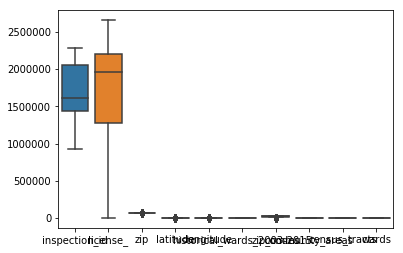

In [176]:
# investigate multiple variables at the same time
sns.boxplot(data=food_inspect_data_restaurant.drop(['inspection_date'], axis=1));

In [ ]:
# note: setting vmin and vmax help balance out the color satuation for comparison
plt.figure(figsize=(8, 8))
sns.heatmap(food_inspect_data_restaurant.corr(), annot=True, cmap="RdBu", center=0, vmin=-1);
    # sns.heatmap(boston.corr(), annot=True, mask=boston.corr() < 0); # masksing values (hide them)

In [ ]:
sns.swarmplot(x="inspection_id", y="license", data=food_inspect_data_restaurant)

In [256]:
food_inspect_data_restaurant.columns

Index(['inspection_id', 'dba_name', 'license', 'risk', 'address', 'zip',
       'inspection_date', 'results', 'violations', 'latitude', 'longitude',
       'location', 'historical_wards_2003_2015', 'zip_codes',
       'community_areas', 'census_tracts', 'wards'],
      dtype='object')

In [ ]:
food_inspect_data_restaurant.to_csv('Data/Food Inspections for Restaurant.csv')

AttributeError: 'NoneType' object has no attribute 'update'

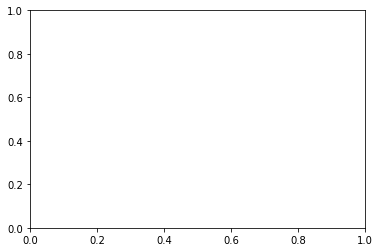

In [188]:
plt.plot(food_inspect_data_restaurant)

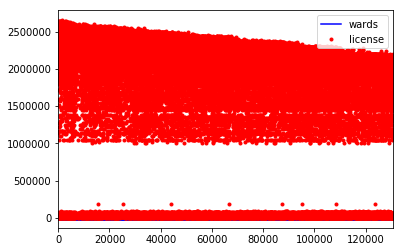

In [199]:
food_inspect_data_restaurant['wards'].plot(color = 'b', style='.-',legend=True)
food_inspect_data_restaurant['license'].plot(color = 'r', style='.',legend=True);

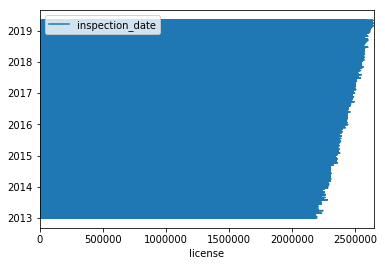

In [201]:
food_inspect_data_restaurant.plot(x='license', y='inspection_date');

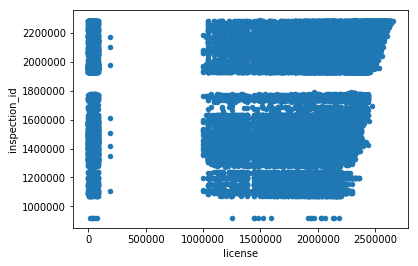

In [204]:
food_inspect_data_restaurant.plot(x='community_areas', y='inspection_id', kind='scatter')


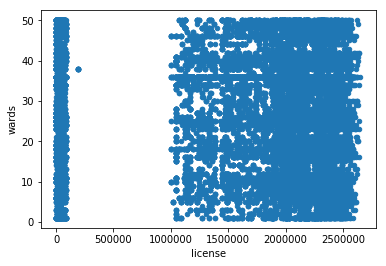

In [212]:
food_inspect_data_restaurant.plot(x='license', y='wards', kind='scatter');

/Users/aseel/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.



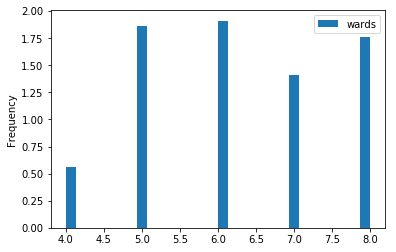

In [210]:
food_inspect_data_restaurant.plot(y='wards', kind='hist', bins=30, range=(4,8), normed=True);

In [214]:
food_inspect_data_restaurant.plot(kind= 'hist', bins=50, range=(0,8), alpha=0.3);

ValueError: view limit minimum -0.4 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x10ddeb268> (for post_execute):


ValueError: view limit minimum -0.4 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum -0.4 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

In [217]:
daily_mean = food_inspect_data_restaurant.inspection_date.resample('D').mean()


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

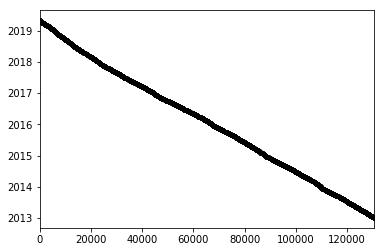

In [226]:
food_inspect_data_restaurant['inspection_date'].plot(style='k.-');

In [230]:
food_inspect_data_restaurant.loc['2016', ['license','violations']].plot(subplots=True)

KeyError: '2016'

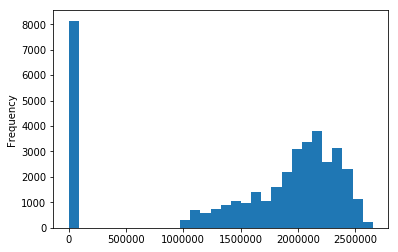

In [234]:
food_inspect_data_restaurant['license'].plot(kind='hist', bins=30);

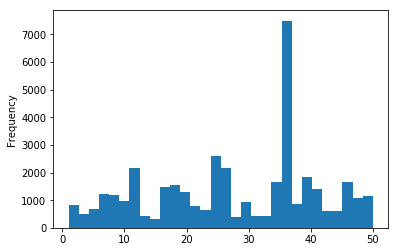

In [237]:
food_inspect_data_restaurant['wards'].plot(kind='hist', bins=30);

## Groupby

In [242]:
food_inspect_data_restaurant.groupby('license')['inspection_date'].count()

license
2.0          8
9.0          9
40.0         5
62.0         9
99.0         5
115.0        5
149.0        6
158.0        4
207.0        3
241.0        3
257.0        8
276.0        7
319.0        1
349.0        7
368.0        1
385.0        5
404.0        6
526.0        1
574.0        6
644.0        1
663.0        5
666.0        1
687.0        1
691.0        5
692.0        1
700.0        4
740.0        3
747.0        2
753.0        1
783.0        6
            ..
2617051.0    1
2617275.0    1
2617404.0    1
2617422.0    1
2621281.0    1
2621507.0    1
2621517.0    1
2621644.0    1
2621839.0    1
2621858.0    1
2621874.0    1
2622264.0    1
2622688.0    1
2622793.0    1
2626424.0    1
2626654.0    1
2626697.0    1
2627220.0    1
2630672.0    1
2631745.0    1
2631850.0    1
2631898.0    1
2631929.0    1
2636205.0    1
2636220.0    1
2637089.0    1
2637197.0    1
2641287.0    1
2641447.0    1
2652316.0    1
Name: inspection_date, Length: 10549, dtype: int64

In [239]:
food_inspect_data_restaurant.columns

Index(['inspection_id', 'dba_name', 'license', 'risk', 'address', 'zip',
       'inspection_date', 'results', 'violations', 'latitude', 'longitude',
       'location', 'historical_wards_2003_2015', 'zip_codes',
       'community_areas', 'census_tracts', 'wards'],
      dtype='object')

In [243]:
food_inspect_data_restaurant.groupby('community_areas')['inspection_date'].count()

community_areas
1.0      107
2.0        3
3.0       51
4.0      120
5.0       75
6.0      819
7.0       39
8.0      437
9.0       98
10.0     708
11.0     253
12.0     185
13.0     393
14.0     699
15.0     648
16.0     679
17.0     416
18.0     123
19.0     842
20.0     832
21.0     164
22.0     450
23.0    1084
24.0     345
25.0    1915
26.0     594
27.0      83
28.0      61
29.0    2796
30.0     144
        ... 
48.0     127
49.0     144
50.0      52
51.0       6
52.0      74
53.0     548
54.0     222
55.0     325
56.0     127
57.0    2586
58.0     297
59.0     348
60.0     140
61.0     304
62.0     198
63.0     369
64.0     234
65.0      77
66.0      70
67.0     170
68.0    1835
69.0     270
70.0     192
71.0     210
72.0      92
73.0     141
74.0     204
75.0     102
76.0     924
77.0     164
Name: inspection_date, Length: 76, dtype: int64

In [245]:
food_inspect_data_restaurant.groupby('census_tracts')['inspection_date'].count()

census_tracts
1.0       75
2.0       33
3.0      429
4.0       48
5.0       87
6.0       67
7.0        7
8.0       12
9.0        3
10.0       3
11.0      14
12.0     108
13.0      13
14.0       1
15.0     102
16.0       1
17.0      72
18.0      61
19.0      20
20.0      40
22.0       4
23.0      35
24.0     101
25.0      37
26.0      81
27.0       7
28.0     124
29.0      70
30.0      66
31.0     157
        ... 
770.0     44
771.0     32
772.0      4
773.0     18
774.0     19
775.0      2
776.0     65
777.0     66
778.0     38
779.0     12
780.0     17
781.0     27
782.0     79
783.0      2
784.0    598
785.0     14
786.0    474
787.0     60
788.0      5
790.0      9
792.0     59
793.0     44
794.0    183
795.0     57
796.0     15
797.0     57
798.0    123
799.0     59
800.0     10
801.0     27
Name: inspection_date, Length: 734, dtype: int64

In [244]:
food_inspect_data_restaurant.groupby('wards')['inspection_date'].count()

wards
1.0      596
2.0      235
3.0      283
4.0      208
5.0      694
6.0      713
7.0      526
8.0      657
9.0      517
10.0     967
11.0    1588
12.0     586
13.0     214
14.0     196
15.0     334
16.0     931
17.0     549
18.0    1542
19.0     527
20.0     757
21.0     591
22.0     202
23.0     629
24.0     889
25.0    1727
26.0    1488
27.0     667
28.0     389
29.0     494
30.0     437
31.0     193
32.0     233
33.0     444
34.0    1371
35.0     280
36.0    7498
37.0     142
38.0     706
39.0     772
40.0    1069
41.0    1404
42.0     476
43.0     147
44.0     398
45.0     197
46.0    1653
47.0     387
48.0     706
49.0     457
50.0     703
Name: inspection_date, dtype: int64

In [257]:
food_inspect_data_restaurant.groupby('risk')['inspection_id'].count()

risk
Risk 1 (High)      33714
Risk 2 (Medium)     5534
Risk 3 (Low)         121
Name: inspection_id, dtype: int64

In [246]:
# Sort inspections by date
df = food_inspect_data_restaurant.sort_values(by="inspection_date")

# Only consider inspections with clear results
df = df.loc[df.results.isin(["Pass", "Fail"])]

# Group inspections by license and shift 1 to find previous results
df["previous_results"] = df.groupby(by="license").shift().results

# Calculate cross tabulation of results and previous results
chart = pd.crosstab(df.previous_results, df.results)

# Make Numpy array of total counts of prior fails and passes with the 
# following(post) results
chart_arr = np.array(chart)

# Create new dataframe from Numpy array to clearly dispay prior and 
# post results
pass_fail_chart = pd.DataFrame({"Prior Fail":chart_arr[:,0],
                                "Prior Pass":chart_arr[:,1]})
pass_fail_chart.index = pass_fail_chart.index.rename("")
pass_fail_chart = pass_fail_chart.rename(index={0:"Post Fail",1:"Post Pass"})

# Display chart
pass_fail_chart

,Prior Fail,Prior Pass
,,
Post Fail,1992,3051
Post Pass,3904,12254


In [326]:
food_inspect_data_restaurant.head() 
# Drop license - address-location-histr

,inspection_id,dba_name,license,risk,address,zip,results,violations,latitude,longitude,...,zip_codes,community_areas,census_tracts,wards,year,month,day_of_week,hour,time,date
3,2288221,PALETERIA AYUTLA,2321232.0,Risk 2 (Medium),2404 W 46TH PL,60632.0,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.809457,-87.684746,...,14924.0,55.0,687.0,3.0,2019,5,Friday,0,00:00:00,2019-05-03
5,2288211,SUBWAY,1495274.0,Risk 1 (High),3167 N LINCOLN AVE,60657.0,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.939425,-87.668111,...,4449.0,57.0,712.0,40.0,2019,5,Friday,0,00:00:00,2019-05-03
16,2286189,LINDO GUADALAJARA RESTAURANT,2196302.0,Risk 1 (High),4761 N CLARK ST,60640.0,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.968819,-87.667338,...,22616.0,31.0,611.0,39.0,2019,5,Thursday,0,00:00:00,2019-05-02
18,2286176,PIEZANO'S LTD,18271.0,Risk 1 (High),2601 W 47TH ST,60632.0,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.808249,-87.689381,...,22248.0,55.0,85.0,3.0,2019,5,Thursday,0,00:00:00,2019-05-02
26,2286196,ORSO'S RESTAURANT,2405009.0,Risk 1 (High),1401 N WELLS ST,60610.0,Pass w/ Conditions,"48. WAREWASHING FACILITIES: INSTALLED, MAINTAI...",41.907743,-87.634461,...,14926.0,37.0,290.0,46.0,2019,5,Thursday,0,00:00:00,2019-05-02


# Modling after cleaning 

In [335]:
# Drop unnecessary columns Because we know we're working on a restaurant in Chicago 
food_inspect_data_restaurant_model = food_inspect_data_restaurant.drop(['license', 'address', 'location','historical_wards_2003_2015','violations'], axis=1)

In [336]:
food_inspect_data_restaurant_model.isnull().sum()

inspection_id      0
dba_name           0
risk               0
zip                0
results            0
latitude           0
longitude          0
zip_codes          0
community_areas    0
census_tracts      0
wards              0
year               0
month              0
day_of_week        0
hour               0
time               0
date               0
dtype: int64

In [365]:
food_inspect_data_restaurant_model.columns

Index(['inspection_id', 'dba_name', 'risk', 'zip', 'results', 'latitude',
       'longitude', 'zip_codes', 'community_areas', 'census_tracts', 'wards',
       'year', 'month', 'day_of_week', 'hour', 'time', 'date'],
      dtype='object')

In [ ]:
# #create a 50/50 train test split; 
# #stratify based on your target variable
# #use a random state of 2018
# X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.5, stratify=y, random_state=2018)

In [393]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [394]:
#find the baseline accuracy:
food_inspect_data_restaurant_model['risk'].value_counts().max()/len(food_inspect_data_restaurant_model)

0.8563590642383602

In [395]:
# modelling
## prepare data
from sklearn.model_selection import train_test_split
#use pd.get_dummies() to dummify your categorical variables
#remember to drop a column!
X = food_inspect_data_restaurant_model.drop('risk', axis=1)
X = food_inspect_data_restaurant_model[['day_of_week','month','year','inspection_id','community_areas','census_tracts','wards','results']]
#   'risk', 'zip', 'results', 'latitude',
#        'longitude', 'zip_codes', 'community_areas', 'census_tracts', 'wards',
#        'year', 'month', 'day_of_week', 'hour', 'time', 'date'
X = pd.get_dummies(X,drop_first=True)

y = food_inspect_data_restaurant_model['risk']

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,stratify=y)

In [396]:
X.head()

,month,year,inspection_id,community_areas,census_tracts,wards,day_of_week_Monday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,results_Not Ready,results_Pass,results_Pass w/ Conditions
3,5,2019,2288221,55.0,687.0,3.0,0,0,0,0,0,0,1
5,5,2019,2288211,57.0,712.0,40.0,0,0,0,0,0,0,1
16,5,2019,2286189,31.0,611.0,39.0,0,1,0,0,0,0,1
18,5,2019,2286176,55.0,85.0,3.0,0,1,0,0,0,0,1
26,5,2019,2286196,37.0,290.0,46.0,0,1,0,0,0,0,1


In [397]:
#create a 50/50 train test split; 
#stratify based on your target variable
#use a random state of 2018
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.3, stratify=y, random_state=24)

In [398]:
#standardise your predictor matrices
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(X_train)
X_train_ss = ss.transform(X_train)
X_test_ss = ss.transform(X_test)

/Users/aseel/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning:

Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.

/Users/aseel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning:

Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.

/Users/aseel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning:

Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.



6. Create a basic Logistic Regression model and use cross_val_score to assess its performance on your training data¶


In [399]:
#create a default Logistic Regression model and find its mean cross-validated accuracy with your training data
#use 5 cross-validation folds
lr = LogisticRegression()
cross_val_score(lr, X_train_ss, y_train, cv=5).mean()

/Users/aseel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Users/aseel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

/Users/aseel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Users/aseel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

/Users/aseel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a so

0.8564050706936568

In [400]:
#create a confusion matrix with cross_val_predict
predictions = cross_val_predict(lr, X_train_ss, y_train, cv=5)
confusion = confusion_matrix(y_test,predictions)
pd.DataFrame(confusion,columns=sorted(y_train.unique()),index=sorted(y_train.unique()))

/Users/aseel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Users/aseel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

/Users/aseel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Users/aseel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

/Users/aseel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a so

ValueError: Found input variables with inconsistent numbers of samples: [27558, 11811]

In [401]:
y_train.value_counts()

Risk 1 (High)      10115
Risk 2 (Medium)     1660
Risk 3 (Low)          36
Name: risk, dtype: int64

7. Find the optimal hyperparameters (optimal regularization) to predict your crime categories using GridSearchCV.¶

In [403]:
#create a hyperparameter dictionary for a logistic regression
inspect_gs_params={'penalty':['l1','l2'],
                 'solver':['liblinear'],
                 'C':np.logspace(-3,0,50)}

In [405]:
#create a gridsearch object using LogisticRegression() and the dictionary you created above
inspect_gs=GridSearchCV(LogisticRegression(),
                      inspect_gs_params,
                      n_jobs=-1,cv=5)

In [407]:
#fit the gridsearch object on your training data
inspect_gs.fit(X_train_ss,y_train)

/Users/aseel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'solver': ['liblinear'], 'C': array([0.001  , 0.00115, 0.00133, 0.00153, 0.00176, 0.00202, 0.00233,
       0.00268, 0.00309, 0.00356, 0.00409, 0.00471, 0.00543, 0.00625,
       0.0072 , 0.00829, 0.00954, 0.01099, 0.01265, 0.01456, 0.01677,
       0.01931, 0.02223...18, 0.32375,
       0.37276, 0.42919, 0.49417, 0.56899, 0.65513, 0.75431, 0.86851,
       1.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [408]:
#print out the best parameters
inspect_gs.best_params_


{'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}

In [409]:
#print out the best mean cross-validated score
inspect_gs.best_score_

0.8564050461434256

In [410]:
#assign your best estimator to the variable 'best_logreg'
best_logreg=inspect_gs.best_estimator_

In [411]:
#score your model on your testing data
best_logreg.score(X_test_ss,y_test)

0.8563393569925248

8. Print out a classification report for your best_logreg model

In [412]:
#use your test data to create your classification report
predictions = best_logreg.predict(X_test_ss)
print(classification_report(y_test, predictions))


/Users/aseel/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

/Users/aseel/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



                 precision    recall  f1-score   support

  Risk 1 (High)       0.86      1.00      0.92     23599
Risk 2 (Medium)       0.00      0.00      0.00      3874
   Risk 3 (Low)       0.00      0.00      0.00        85

      micro avg       0.86      0.86      0.86     27558
      macro avg       0.29      0.33      0.31     27558
   weighted avg       0.73      0.86      0.79     27558



/Users/aseel/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [284]:
#standardise your predictor matrices
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(X_train)
X_train_ss = ss.transform(X_train)
X_test_ss = ss.transform(X_test)

ValueError: could not convert string to float: 'THE PASTA BOWL COMPANY'

In [282]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test) # default is accuracy

/Users/aseel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



ValueError: could not convert string to float: 'THE PASTA BOWL COMPANY'

In [286]:
#create a default Logistic Regression model and find its mean cross-validated accuracy with your training data
#use 5 cross-validation folds


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

lr = LogisticRegression()
cross_val_score(lr, X_train_ss, y_train, cv=5).mean()

NameError: name 'X_train_ss' is not defined

In [274]:
# model evaluation with RMSE
import numpy as np
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

NotFittedError: This LogisticRegression instance is not fitted yet